<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">การวิเคราะห์ข้อมูลถดถอยลอจิสติก (Logistic Regression)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1> 

In [1]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">โจทย์ปัญหา:</h1>


สมมติว่าเราต้องการโมเดลที่สามารถทำนาย Y โดยมีข้อมูลฟีเจอร์ X ที่กำหนดให้ 2 ข้อมูล ดังนี้:

<div align="center">
    <table>
        <tr>
            <th>X1</th>
            <th>X2</th>
            <th>Y</th>
        </tr>
        <tr>
            <td>2.5</td>
            <td>1.3</td>
            <td>0</td>
        </tr>
        <tr>
            <td>1.7</td>
            <td>2.8</td>
            <td>1</td>
        </tr>
        <tr>
            <td>3.1</td>
            <td>1.0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>2.0</td>
            <td>3.2</td>
            <td>1</td>
        </tr>
        <tr>
            <td>1.6</td>
            <td>2.0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>3.3</td>
            <td>1.5</td>
            <td>1</td>
        </tr>
        <tr>
            <td>2.8</td>
            <td>2.4</td>
            <td>0</td>
        </tr>
        <tr>
            <td>1.2</td>
            <td>2.5</td>
            <td>1</td>
        </tr>
        <tr>
            <td>3.0</td>
            <td>1.9</td>
            <td>0</td>
        </tr>
        <tr>
            <td>2.3</td>
            <td>3.0</td>
            <td>1</td>
        </tr>
    </table>
</div>


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 สร้างตัวแปรเก็บข้อมูล</h1>


In [3]:
# สร้างตัวแปรที่ชื่อว่า X_train เพื่อเก็บข้อมูล X1 และ X2
X_train = np.array([
    [2.5, 1.3],
    [1.7, 2.8],
    [3.1, 1.0],
    [2.0, 3.2],
    [1.6, 2.0],
    [3.3, 1.5],
    [2.8, 2.4],
    [1.2, 2.5],
    [3.0, 1.9],
    [2.3, 3.0]
])

# สร้างตัวแปรที่ชื่อว่า y_train เพื่อเก็บข้อมูล Y
y_train = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])   

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. หลักการทำงานของ Logistic Regression Model</h1>

Logistic Regression คือการวิเคราะห์ทางสถิติที่ใช้ในการทำนายผลของตัวแปรตาม (dependent variable) ที่เป็นทวิภาค (binary) จากตัวแปรต้นหนึ่งตัวหรือมากกว่า ที่เป็นตัวแปรต่อเนื่องหรือตัวแปรประเภท (categorical variable) โดยตัวแปรตามที่เป็นทวิภาคนั้น มีค่าที่เป็นไปได้แค่ 2 ค่า เช่น 0 และ 1 

หลักการของ Logistic Regression คือการสร้างแบบจำลองที่สามารถทำนายความน่าจะเป็น (Probability) ของเหตุการณ์หนึ่ง ๆ โดยใช้ฟังก์ชันลอจิสติก
(Logistic Function)

หรือที่เรียกว่า Sigmoid Function ซึ่งมีสมการดังนี้:

<div style="font-size: 30px;">

$$ P(Y=1|X) = \frac{1}{1 + e^{-z}} $$

</div>

โดยที่:

- $P(Y=1|X)$: ความน่าจะเป็นที่ผลลัพธ์ $Y$ จะมีค่าเป็น 1 เมื่อรู้ค่าของตัวแปรอิสระ $X$
- $X$: ตัวแปรอิสระ (independent variable) หรือกลุ่มของตัวแปรอิสระที่ใช้ในการพยากรณ์ผลลัพธ์ $Y$ ซึ่งอาจประกอบด้วยตัวแปรหลายตัว เช่น $X_1, X_2, \ldots, X_n$
- $z$: ค่ารวมเชิงเส้น (linear combination) ของตัวแปรอิสระ $X$ และค่าสัมประสิทธิ์ $\beta$ ของโมเดล ซึ่งคำนวณได้จากสมการ:

  <div style="font-size: 30px;">

  $$
  z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n
  $$

  </div>

- $\beta_0$: ค่าคงที่ (intercept) ของสมการ เป็นจุดที่เส้นโค้งตัดกับแกน $y$ เมื่อค่าของตัวแปรอิสระทั้งหมดเป็นศูนย์
- $\beta_1, \beta_2, \ldots, \beta_n $: ค่าสัมประสิทธิ์ (coefficients) ของตัวแปรอิสระ $X_1, X_2, \ldots, X_n$ ที่ระบุถึงผลกระทบของแต่ละตัวแปรอิสระต่อผลลัพธ์ $Y$
- $e$: ค่าคงที่ทางคณิตศาสตร์ ซึ่งมีค่าเท่ากับประมาณ 2.71828 (ฐานของลอการิทึมธรรมชาติ)

<div style="text-align: center;">
    <img src="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" alt="Logistic" width="600" height="400"/>
    <br>
    <span style="font-size: small;">ฟังก์ชัน Sigmoid </span>
</div>

ดังนั้น สมการของ Logistic Regression สามารถเขียนได้ดังนี้:

<div style="font-size: 24px;">

$$ P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p)}} $$

</div>

เราจะใช้ความน่าจะเป็นที่ได้จากโมเดลเพื่อจำแนกประเภท โดยกำหนดขีดแบ่ง (Decision Boundary) ที่ใช้เพื่อตัดสินใจว่าควรจะจัดแต่ละตัวอย่างเข้าไปในคลาสไหน

สามารถเขียนเป็นสมการได้ดังนี้:

<div style="font-size: 24px;">

$$ P \geq 0.5 \Rightarrow \text{class} = 1 $$

$$ P < 0.5 \Rightarrow \text{class} = 0 $$

</div>

<h1 style="font-size: 18px;">2.1 สร้างโมเดลลอจิสติกสมมติ และพลอตกราฟแสดงผลลัพธ์</h1>

In [6]:
# ฟังก์ชันซิกมอยด์
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ฟังก์ชันทำนาย
def predict(X, weights, bias):
    linear_combination = np.dot(X, weights) + bias
    return sigmoid(linear_combination)

# กำหนดพารามิเตอร์สมมติ
weights = np.array([0.89, -1.5])
bias = 0.2

# ทำนายค่าด้วยพารามิเตอร์สมมติ
y_pred = predict(X_train, weights, bias)

print(f"Predicted Probability: {y_pred}")

# สร้างขอบเขตการตัดสินใจ (Decision Boundary)
decision_boundary = 0.65
y_pred_class = np.where(y_pred >= decision_boundary, 1, 0)

print(f"Predicted classes by decision boundary: {y_pred_class}")

Predicted Probability: [0.6165665  0.07677457 0.81137968 0.05625293 0.20165219 0.70827069
 0.28740927 0.07712972 0.50499983 0.09509101]
Predicted classes by decision boundary: [0 0 1 0 0 1 0 0 0 0]


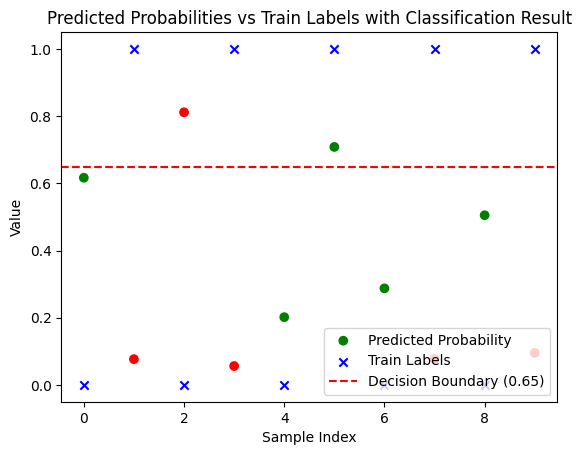

In [7]:
# กำหนดสีสำหรับการทำนายถูกและผิด
colors = ['green' if y_pred_class[i] == y_train[i] else 'red' for i in range(len(y_pred))]

# สร้างกราฟเปรียบเทียบค่า Predicted Probability และ Train Labels
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Probability', color=colors, marker='o')
plt.scatter(range(len(y_train)), y_train, label='Train Labels', color='blue', marker='x')

# แสดงเส้นขอบเขตการตัดสินใจที่ค่าใหม่ (0.66)
plt.axhline(y=decision_boundary, color='r', linestyle='--', label=f'Decision Boundary ({decision_boundary})')

# ตั้งชื่อและแสดงกราฟ
plt.title('Predicted Probabilities vs Train Labels with Classification Result')
plt.xlabel('Sample Index')
plt.ylabel('Value')

# แสดงคำอธิบาย
plt.legend(loc= 'lower right')

# แสดงกราฟ
plt.show()

<h1 style="font-size: 18px;">2.2 คำนวณค่า Cost ที่เกิดขึ้น</h1>

<h1 style="font-size: 18px;">ในที่นี้จะใช้ Binary Crossentropy Loss เป็นค่า Cost ที่ใช้วัดความแม่นยำของ Logistic Regression Model นี้</h1>
<h1 style="font-size: 18px;">Binary Crossentropy Loss สามารถคำนวณได้ดังนี้:</h1>

<div style="font-size: 24px;">

$$ J(w,b) = - \frac{1}{m} \sum_{i=1}^{m} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $$

</div>

โดยที่:

- $J(w,b)$ คือค่า Cost โดยในที่นี้เราใช้เป็น Binary Crossentropy Loss
- $m$ คือจำนวนข้อมูล
- $y_i$ คือค่าจริง (actual) สำหรับข้อมูลลำดับที่ $i$
- $\hat{y}_i$ คือค่าที่ทำนาย (predict) สำหรับข้อมูลลำดับที่ $i$


In [8]:
# ฟังก์ชันคำนวณค่าเสียหาย (Binary Cross Entropy Loss)
def compute_loss(y_true, y_pred):
    m = len(y_true)
    return -1/m * np.sum(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

# คำนวณค่าเสียหาย
loss = compute_loss(y_train, y_pred)

# พิมพ์ผลลัพธ์
print(f"True classes: {y_train}")
print(f"Predicted Probability: {y_pred}")
print(f"Loss: {loss}")

True classes: [0 1 0 1 0 1 0 1 0 1]
Predicted Probability: [0.6165665  0.07677457 0.81137968 0.05625293 0.20165219 0.70827069
 0.28740927 0.07712972 0.50499983 0.09509101]
Loss: 1.4598759743248129


<h1 style="font-size: 18px;">2.3 ทำ Gradient Descent จากค่า Cost ที่หาได้จากสมการนี้</h1>

<div style="font-size: 24px;">

$$ J(w,b) = - \frac{1}{m} \sum_{i=1}^{m} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $$

</div>

การทำ Gradient Descent คือการที่เราต้องการปรับปรุงค่า $w_1$, $w_2$, ... , $w_n$ และ $b$ ให้เหมาะสมกับชุดข้อมูลมากที่สุด สามารถทำได้ด้วยการหา gradient ของฟังก์ชัน Cost $J(w,b)$ (ในที่นี้เราใช้ Binary Crossentropy Loss) เทียบกับ $w_1$, $w_2$, ... , $w_n$ และ $b$ จากนั้นก็อัพเดท $w_1$, $w_2$, ... , $w_n$ และ $b$ ใหม่ หรือก็คือเราจะทำซ้ำจนกว่าจะลู่เข้า:

<div style="font-size: 24px;">

$$
\begin{align*}
w_1 &:= w_1 - \alpha \frac{\partial J(w_1,b)}{\partial w_1} \\
w_2 &:= w_2 - \alpha \frac{\partial J(w_2,b)}{\partial w_2} \\
\vdots \\
w_n &:= w_n - \alpha \frac{\partial J(w_n,b)}{\partial w_n} \\
b &:= b - \alpha \frac{\partial J(w,b)}{\partial b} \\
\end{align*}
$$

</div>

โดยที่:
- $w_1$, $w_2$, ... , $w_n$ คือ พารามิเตอร์ weight
- $b$ คือ พารามิเตอร์ bias 
- $\alpha$ คือ อัตราการเรียนรู้ (learning rate) ที่ควบคุมขนาดของการอัพเดทในแต่ละรอบการทำงาน
- $\frac{\partial J(w,b)}{\partial w}$ และ $\frac{\partial J(w,b)}{\partial b}$ คือ gradient ของฟังก์ชัน Cost เทียบกับ $w$ และ $b$ ตามลำดับ ซึ่งสามารถคำนวณได้ดังนี้:

<div style="font-size: 24px;">

$$
\frac{\partial J(w_1, w_2, \dots, w_n, b)}{\partial w_j} = \frac{\partial}{\partial w_j} \left( - \frac{1}{m} \sum_{i=1}^{m} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] \right)
$$

$$
\frac{\partial}{\partial w_j} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] = \left( \hat{y}_i - y_i \right) x_{ij}
$$

$$
\textcolor{yellow}{
\frac{\partial J(w_1, w_2, \dots, w_n, b)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)x_{ij}, \quad \text{for } j = 1, 2, \dots, n}
$$

</div>

-----------------------------------------------------------------------------------------------------

<div style="font-size: 24px;">

$$
\frac{\partial J(w_1, w_2, \dots, w_n, b)}{\partial b} = \frac{\partial}{\partial b} \left( - \frac{1}{m} \sum_{i=1}^{m} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] \right)
$$

$$
\frac{\partial}{\partial b} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] = \left( \hat{y}_i - y_i \right)
$$

$$
\textcolor{yellow}{
\frac{\partial J(w_1, w_2, \dots, w_n, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)}
$$

</div>


In [9]:
# นิยามอัลกอริทึม gradient descent
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = len(y)
    for epoch in range(epochs):
        # ทำนายค่า
        y_pred = predict(X, weights, bias)
        
        # คำนวณเกรเดียนต์
        dw = 1/m * np.dot(X.T, (y_pred - y))
        db = 1/m * np.sum(y_pred - y)
        
        # ปรับปรุงพารามิเตอร์
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # ถ้าต้องการ สามารถพิมพ์ค่าเสียหายทุกๆ 100 รอบได้
        if epoch % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {epoch}: Loss = {loss}")
    
    return weights, bias

# เริ่มต้นพารามิเตอร์
weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 1.0
epochs = 10000

# ฝึกโมเดล
weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate, epochs)

# พิมพ์น้ำหนักและไบแอสสุดท้าย
print(f"Weights: {weights}")
print(f"Bias: {bias}")

Epoch 0: Loss = 0.6931471805599454
Epoch 100: Loss = 0.49407384714727853
Epoch 200: Loss = 0.4824021549924357
Epoch 300: Loss = 0.4761486685176999
Epoch 400: Loss = 0.47274672846080396
Epoch 500: Loss = 0.47086785656826474
Epoch 600: Loss = 0.46981648583874214
Epoch 700: Loss = 0.4692218301899935
Epoch 800: Loss = 0.46888261745142157
Epoch 900: Loss = 0.4686878242514989
Epoch 1000: Loss = 0.46857538351746153
Epoch 1100: Loss = 0.4685102190201007
Epoch 1200: Loss = 0.46847233663726073
Epoch 1300: Loss = 0.4684502620119204
Epoch 1400: Loss = 0.46843737534572444
Epoch 1500: Loss = 0.4684298418732164
Epoch 1600: Loss = 0.46842543311896523
Epoch 1700: Loss = 0.4684228508941061
Epoch 1800: Loss = 0.46842133751978454
Epoch 1900: Loss = 0.4684204501413918
Epoch 2000: Loss = 0.4684199296273228
Epoch 2100: Loss = 0.4684196242198823
Epoch 2200: Loss = 0.4684194449854553
Epoch 2300: Loss = 0.46841933978059197
Epoch 2400: Loss = 0.4684192780208008
Epoch 2500: Loss = 0.46841924176158156
Epoch 2600: 

Predictions: [0.10474412 0.81929532 0.05415522 0.92459098 0.38721885 0.16474331
 0.63880648 0.68025592 0.34267093 0.88351886]
Predictions with decision boundary: [0 1 0 1 0 0 0 1 0 1]


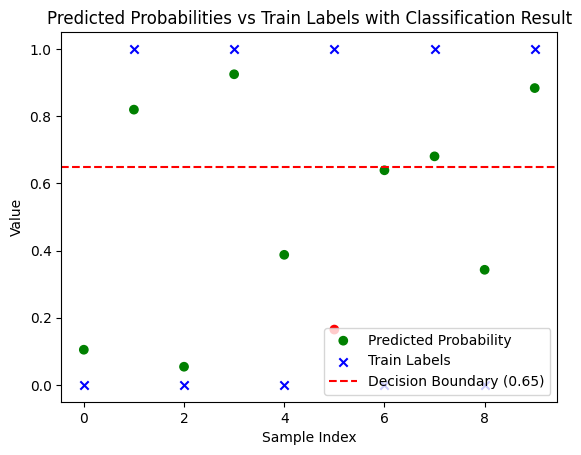

In [13]:
# ทำนายค่าบนข้อมูลการฝึก
y_pred = predict(X_train, weights, bias)
decision_boundary = 0.65
y_pred_class = np.where(y_pred >= decision_boundary, 1, 0)
print(f"Predictions: {y_pred}")
print(f"Predictions with decision boundary: {y_pred_class}")

# กำหนดสีสำหรับการทำนายถูกและผิด
colors = ['green' if y_pred_class[i] == y_train[i] else 'red' for i in range(len(y_pred))]

# สร้างกราฟเปรียบเทียบค่า Predicted Probability และ Train Labels
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Probability', color=colors, marker='o')
plt.scatter(range(len(y_train)), y_train, label='Train Labels', color='blue', marker='x')

# แสดงเส้นขอบเขตการตัดสินใจที่ค่าใหม่ (0.66)
plt.axhline(y=decision_boundary, color='r', linestyle='--', label=f'Decision Boundary ({decision_boundary})')

# ตั้งชื่อและแสดงกราฟ
plt.title('Predicted Probabilities vs Train Labels with Classification Result')
plt.xlabel('Sample Index')
plt.ylabel('Value')

# แสดงคำอธิบาย
plt.legend(loc= 'lower right')

# แสดงกราฟ
plt.show()

<h1 style="font-size: 18px;">2.4 การทำนายข้อมูลชุดใหม่ (Unseen Data)</h1>

In [14]:
# สร้างชุดข้อมูลใหม่ที่ไม่เคยมีมาก่อน
X_test = np.array([[2.3, 3.0]])

# ทำนายค่าด้วยพารามิเตอร์สมมติ
y_pred = predict(X_test, weights, bias)

print(f"Predicted classes: {y_pred}")

# สร้างขอบเขตการตัดสินใจ (Decision Boundary)
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

print(f"Predicted classes by decision boundary: {y_pred_class}")

Predicted classes: [0.88351886]
Predicted classes by decision boundary: [1]


# Interactive Output สำหรับ Logistic Regression

In [15]:
from ipywidgets import interact

plt.style.use('ggplot')

X = np.linspace(0, 10, 100)
y_true = (3 * X + 5 + np.random.randn(100) * 2) > 20

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def plot_logistic_regression_and_bce(w=1.0, b=0.0):
    z = w * X + b
    y_pred = sigmoid(z)
    
    bce = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(X, y_true, label='True Data', color='dodgerblue', alpha=0.7)
    plt.plot(X, y_pred, color='crimson', linewidth=2.5, label=f'Prediction: sigmoid({w:.2f}x + {b:.2f})')
    plt.xlabel('X')
    plt.ylabel('Probability')
    plt.title('Interactive Logistic Regression', fontsize=16)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.subplot(1, 2, 2)
    errors = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    plt.plot(X, errors, 'o', label='Binary Cross-Entropy Error', color='purple', alpha=0.7)
    plt.axhline(y=bce, color='green', linestyle='--', linewidth=2, label=f'BCE = {bce:.2f}')
    plt.xlabel('X')
    plt.ylabel('BCE Error')
    plt.title('BCE Cost Function', fontsize=16)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

interact(plot_logistic_regression_and_bce, w=(-10.0, 10.0, 0.1), b=(-10.0, 30.0, 0.1));

interactive(children=(FloatSlider(value=1.0, description='w', max=10.0, min=-10.0), FloatSlider(value=0.0, des…